<p align="center"> <img src="https://drive.google.com/uc?export=view&id=19ig7YaRrHpMhKMiVvwtqRXRWYQS-Wous"> </p>

# Task - 7 Develop A Neural Network That Can Read Handwriting
##### ***Author: Saumya Gupta, Data Science Intern at LetsGrowMore***

Begin your neural network machine learning project with the MNIST Handwritten Digit Classification Challenge and using Tensorflow and CNN. It has a very user-friendly interface thatâ€™s ideal for beginners.

**Link for the dataset:** http://yann.lecun.com/exdb/mnist/

# Importing the necessary libraries

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt

# Loading the MNIST dataset

**The MNIST Dataset is conatined in the Tensorflow library and can be loaded using Keras. The dataset is then further divided into the training and test sets**

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Visualizing the dataset

In [ ]:
X_train.shape

(60000, 28, 28)

The training dataset contains 60,000 images where each is 28x28 pixel greyscale image.

In [ ]:
Y_train.shape

(60000,)

In [ ]:
X_test.shape

(10000, 28, 28)

The training dataset contains 10,000 images where each is 28x28 pixel greyscale image

### Checking the values of each pixel before the normalization process

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Visualising the dataset

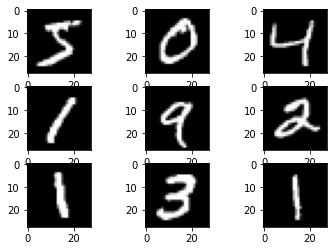

In [ ]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

### Reshaping the data

In [ ]:
X_train_r = X_train.reshape(X_train.shape[0], X_train.shape[2], X_train.shape[2], 1)
X_test_r = X_test.reshape(X_test.shape[0], X_test.shape[2], X_test.shape[2], 1)

## Normalizing the data

In [ ]:
X_train_r = tf.keras.utils.normalize(X_train_r, axis = 1)
X_test_r = tf.keras.utils.normalize(X_test_r, axis = 1)

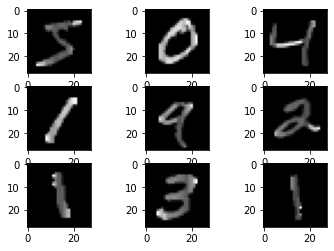

In [ ]:
#Visualising the data after normalization
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(np.squeeze(X_train_r[i]), cmap=plt.get_cmap('gray'))
plt.show()

# Creating a simple CNN Model

In [ ]:
image_shape = X_train_r.shape[1:]
print(image_shape)

(28, 28, 1)


In [ ]:
model = model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(48, (3,3), activation = tf.nn.relu, input_shape = image_shape))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation = tf.nn.relu))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train_r, Y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1835 - accuracy: 0.9430
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0741 - accuracy: 0.9757
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0537 - accuracy: 0.9826
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0433 - accuracy: 0.9862
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0376 - accuracy: 0.9880
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0329 - accuracy: 0.9895
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0285 - accuracy: 0.9905
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0258 - accuracy: 0.9913
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0228 - accuracy: 0.9926
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

### Summary of the CNN Model

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 48)        480       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 48)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        27712     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 5, 5, 64)          0         
                                                                 
 flatten_6 (Flatten)         (None, 1600)             

### Plotting the CNN Model

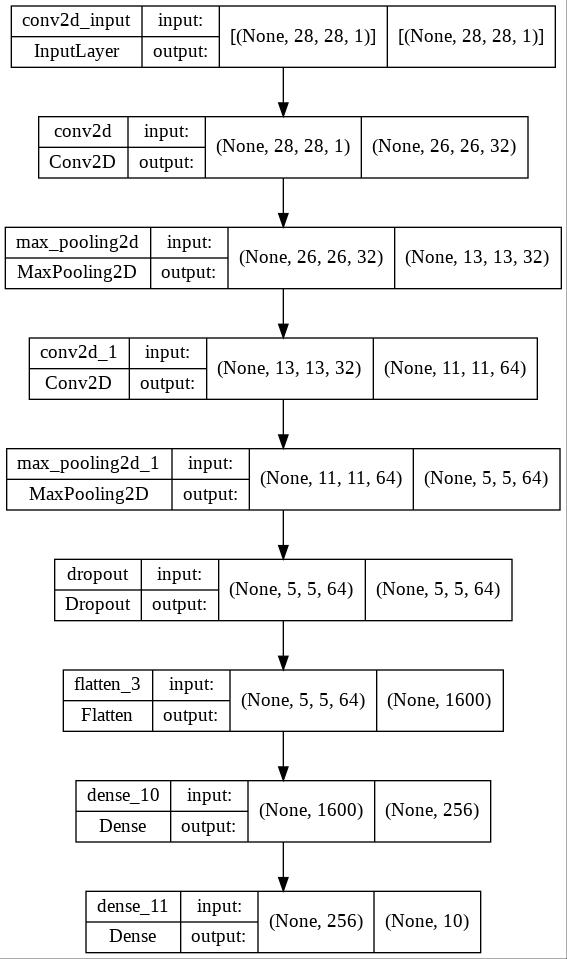

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model2, 'model.jpg', show_shapes = True)

# Evaluating the model based on validation loss and validation accuracy

In [ ]:
val_loss, val_accuracy = model.evaluate(X_test, Y_test)
print("Validation loss : ", val_loss*100, "%")
print("Validation accuracy : ", val_accuracy*100,"%")

313/313 [==============================] - 2s 5ms/step - loss: 0.0255 - accuracy: 0.9925
Validation loss :  2.5535793974995613 %
Validation accuracy :  99.25000071525574 %


### Saving the model

In [ ]:
model.save('/content/drive/MyDrive/Machine Learning Projects/Mnist.model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Machine Learning Projects/Mnist.model/assets


## Predicting a random test case 

In [ ]:
new_model = tf.keras.models.load_model("/content/drive/MyDrive/Machine Learning Projects/Mnist.model")


In [ ]:
predictions = new_model.predict(X_test)

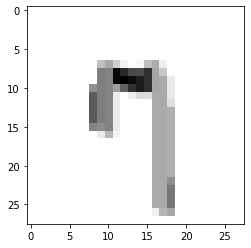

In [ ]:
plt.imshow(X_test[80], cmap = plt.get_cmap('binary'))

In [ ]:
print("The prediction is : ", np.argmax(predictions[80]))

The prediction is :  7


## Thank You!